In [2]:
import math
import numpy as np

def track_bound_crossprod(waypoint,c_one,c_two):
    ac=waypoint-c_one
    ab=c_two-c_one
    cross_product = np.cross(ab,ac)
    norm_ab = np.linalg.norm(ab)
    norm_cross = np.linalg.norm(cross_product)
    distance = norm_cross / norm_ab
    return distance
    


In [3]:
import json

points = json.load(open('bag_points.json'))

center_line = np.array(points["TRACK"])
b_boundary = np.array(points["BLUE"])
y_boundary = np.array(points["YELLOW"])

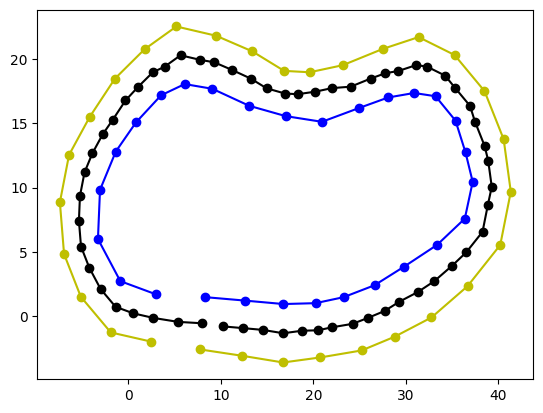

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(center_line[:, 0], center_line[:, 1], 'o-k')
plt.plot(b_boundary[:, 0], b_boundary[:, 1], 'o-b')
plt.plot(y_boundary[:, 0], y_boundary[:, 1], 'o-y')


# Show the plot
plt.show()

In [7]:
l=0
r=0
n = center_line.shape[0]
b_dist = np.zeros(n,dtype=float)
y_dist = np.zeros(n,dtype=float)
for i in range(n):
    if i%2 == 0 and i != 0:
        r+=1
        b_dist[i]=track_bound_crossprod(center_line[i],b_boundary[l%(n-1)],b_boundary[(l+1)%(n-1)])
        y_dist[i]=track_bound_crossprod(center_line[i],y_boundary[r%(n-1)],y_boundary[(r+1)%(n-1)])
    elif i%2 == 1 and i != 0:
        l+=1
        b_dist[i]=track_bound_crossprod(center_line[i],b_boundary[l%(n-1)],b_boundary[(l+1)%(n-1)])
        y_dist[i]=track_bound_crossprod(center_line[i],y_boundary[r%(n-1)],y_boundary[(r+1)%(n-1)])
    else:
        b_dist[i]=track_bound_crossprod(center_line[i],b_boundary[l%(n-1)],b_boundary[(l+1)%(n-1)])
        y_dist[i]=track_bound_crossprod(center_line[i],y_boundary[r%(n-1)],y_boundary[(r+1)%(n-1)])

print(b_dist)
print(y_dist)

[2.14622822 2.14630257 2.14630257 2.26711044 2.11059942 2.12153044
 2.12153044 2.25282311 2.25282311 2.26844769 2.26844769 2.41583369
 2.41583369 2.25125103 2.25125103 2.12828959 2.08412487 1.82609568
 2.11719217 2.09424298 1.89670869 1.89758671 1.88069704 1.70201271
 2.18323572 2.12328565 1.90535275 1.89760294 1.89760294 1.83206592
 2.24655533 2.24766886 1.83682617 1.70420142 1.70420142 2.05880674
 2.05880674 2.06833178 2.06833178 2.26197479 1.97752753 1.95930227
 2.03927797 1.99783342 1.94800229 1.89234392 2.12724232 1.75077237
 2.13749203 0.8065486  1.82059572 0.13750907 1.13328032 0.
 0.         0.         0.         0.        ]
[2.04613426 2.14561241 2.254793   2.254793   2.25535019 2.12148726
 2.16971662 2.16971662 2.22537379 2.22537379 2.36702427 2.36702427
 2.23103169 2.23103169 2.04359932 2.04359932 2.11893307 2.088233
 1.9522567  2.12153501 2.05204297 1.92768163 1.8942199  1.88288223
 1.85299423 2.12488698 2.05501947 1.90102833 1.84068354 1.84068354
 1.58186669 1.58186669 1.7